In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

In [2]:
def confidence_interval(data, percentage=95):
    if percentage == 95:
        z = 1.96
    else:
        raise(ValueError("frero..."))
    
    std = np.std(data)
    N = data.shape[0]

    diff = z * std/np.sqrt(N)

    return diff

import os

def last_part(path):
    return os.sep.join(path.rsplit(r"/")[-2:-1])

# bdd checks

In [3]:
bdd = pd.read_csv("/volatile/jc225751/Runs/59_analysis_ukbiobank/Output/checks/summary/bdd_checks.csv", index_col=0)
bdd = bdd.sort_values(by=['model_path'], ascending=True)
bdd.head()

,model_path,auc,auc_std,accuracy,accuracy_std,input_size,model,train_val_csv_file,with_labels
0,/volatile/jc225751/Runs/59_analysis_ukbiobank/...,0.559289,0.007669,0.552889,0.015410,"(1, 17, 40, 38)",SimCLR_supervised,/neurospin/dico/data/deep_folding/papers/micca...,True
1,/volatile/jc225751/Runs/59_analysis_ukbiobank/...,0.707661,0.003771,0.670830,0.007857,"(1, 18, 41, 38)",SimCLR_supervised,/neurospin/dico/data/deep_folding/papers/micca...,True
2,/volatile/jc225751/Runs/59_analysis_ukbiobank/...,0.739730,0.003387,0.674339,0.009485,"(1, 18, 41, 38)",SimCLR_supervised,/neurospin/dico/data/deep_folding/papers/micca...,True
3,/volatile/jc225751/Runs/59_analysis_ukbiobank/...,0.658964,0.003382,0.634667,0.012555,"(1, 18, 41, 38)",SimCLR_supervised,/neurospin/dico/data/deep_folding/papers/micca...,True
4,/volatile/jc225751/Runs/59_analysis_ukbiobank/...,0.722710,0.004331,0.676538,0.010248,"(1, 18, 41, 38)",SimCLR_supervised,/neurospin/dico/data/deep_folding/papers/micca...,True


In [4]:
bdd["short_model_path"] = bdd.model_path.apply(last_part)
bdd

,model_path,auc,auc_std,accuracy,accuracy_std,input_size,model,train_val_csv_file,with_labels,short_model_path
0,/volatile/jc225751/Runs/59_analysis_ukbiobank/...,0.559289,0.007669,0.552889,0.015410,"(1, 17, 40, 38)",SimCLR_supervised,/neurospin/dico/data/deep_folding/papers/micca...,True,2022_github
1,/volatile/jc225751/Runs/59_analysis_ukbiobank/...,0.707661,0.003771,0.670830,0.007857,"(1, 18, 41, 38)",SimCLR_supervised,/neurospin/dico/data/deep_folding/papers/micca...,True,2023+aug_from_miccai+rot_from_main
2,/volatile/jc225751/Runs/59_analysis_ukbiobank/...,0.739730,0.003387,0.674339,0.009485,"(1, 18, 41, 38)",SimCLR_supervised,/neurospin/dico/data/deep_folding/papers/micca...,True,2023+aug_from_miccai+rot_from_main
3,/volatile/jc225751/Runs/59_analysis_ukbiobank/...,0.658964,0.003382,0.634667,0.012555,"(1, 18, 41, 38)",SimCLR_supervised,/neurospin/dico/data/deep_folding/papers/micca...,True,2023+aug_from_miccai+rot_from_main
4,/volatile/jc225751/Runs/59_analysis_ukbiobank/...,0.722710,0.004331,0.676538,0.010248,"(1, 18, 41, 38)",SimCLR_supervised,/neurospin/dico/data/deep_folding/papers/micca...,True,2023+aug_from_miccai+rot_from_main
...,...,...,...,...,...,...,...,...,...,...
40,/volatile/jc225751/Runs/59_analysis_ukbiobank/...,0.741189,0.002659,0.691532,0.006607,"(1, 17, 40, 38)",SimCLR,NaN,False,reference_ipmi2023
41,/volatile/jc225751/Runs/59_analysis_ukbiobank/...,0.745901,0.003135,0.699181,0.006776,"(1, 17, 40, 38)",SimCLR,NaN,False,reference_ipmi2023
42,/volatile/jc225751/Runs/59_analysis_ukbiobank/...,0.749881,0.003085,0.699977,0.010915,"(1, 17, 40, 38)",SimCLR,NaN,False,reference_ipmi2023
43,/volatile/jc225751/Runs/59_analysis_ukbiobank/...,0.668262,0.002930,0.662199,0.008900,"(1, 17, 40, 38)",SimCLR,NaN,False,reference_ipmi2023


(0.5, 0.8)

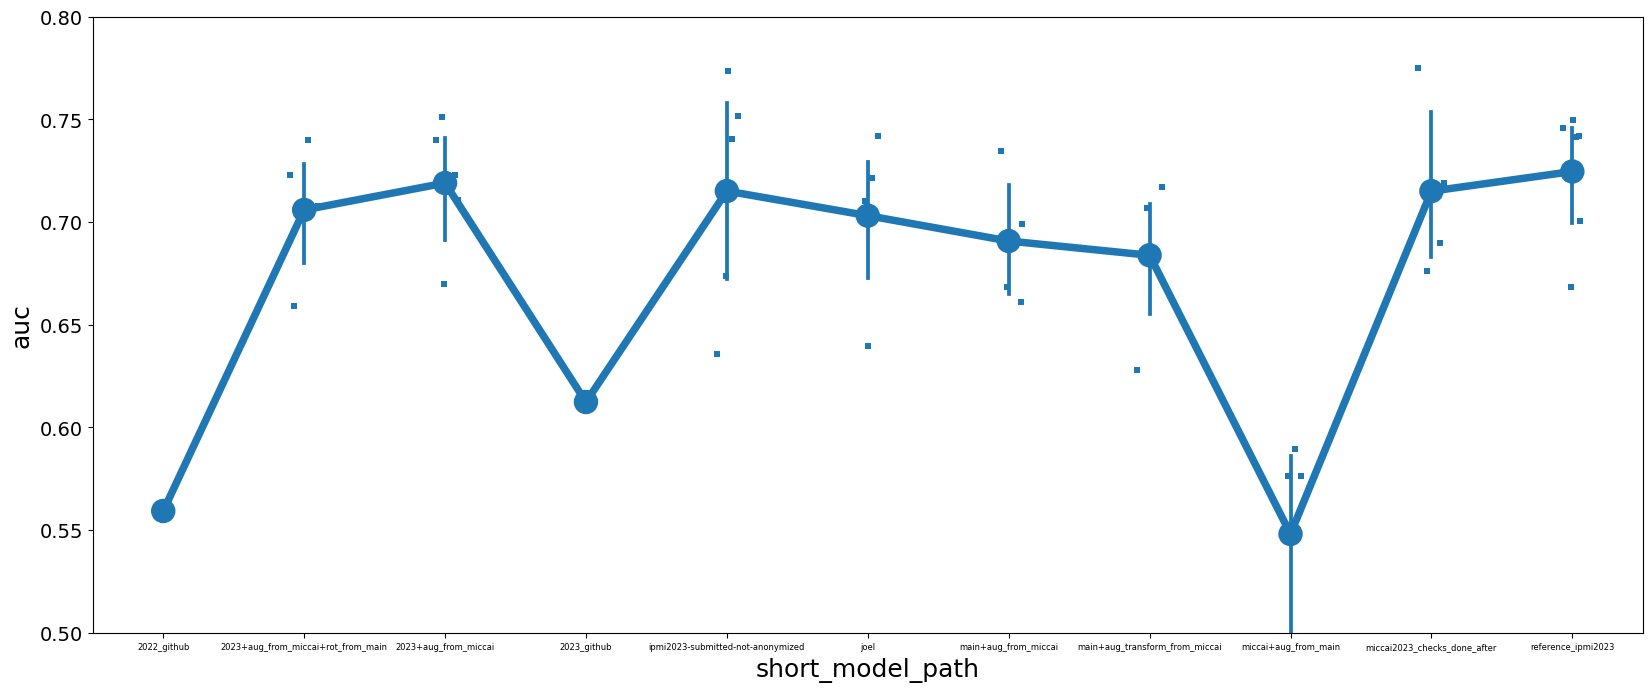

In [5]:
plt.rc('xtick', labelsize=6) 
plt.rc('ytick', labelsize=14) 
plt.rc('axes', labelsize=18) 
f, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.pointplot(data=bdd, x=bdd.short_model_path, y="auc", scale=2,ax=ax)
sns.stripplot(data=bdd, x=bdd.short_model_path, y="auc", marker='s', jitter=0.1, ax=ax)
# ax.legend([],[], frameon=False)
ax.set_ylim([0.5,0.8])
# ax.set_xscale('log')